In [1]:
import numpy as np
import matplotlib.pyplot as plt

from envs import Maze
from utils import plot_policy, plot_action_values, test_agent

In [2]:
env = Maze()

D:\A\envs\tensorflow\lib\site-packages\pyglet\image\codecs\wic.py:406: UserWarning: [WinError -2147417850] Cannot change thread mode after it is set
  warnings.warn(str(err))


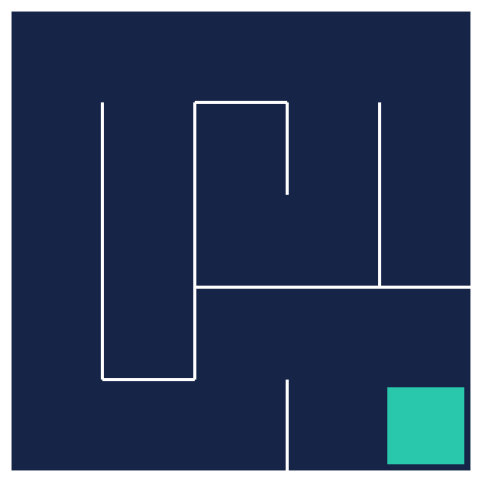

In [3]:
frame = env.render(mode='rgb_array')
plt.figure(figsize=(6, 6))
plt.axis('off')
plt.imshow(frame)

In [4]:
print(f"Observation space shape: {env.observation_space.nvec}")
print(f"Number of actions: {env.action_space.n}")

Observation space shape: [5 5]
Number of actions: 4


In [5]:
action_values = np.full((5,5,4), -100)
action_values[4,4,:] = 0.

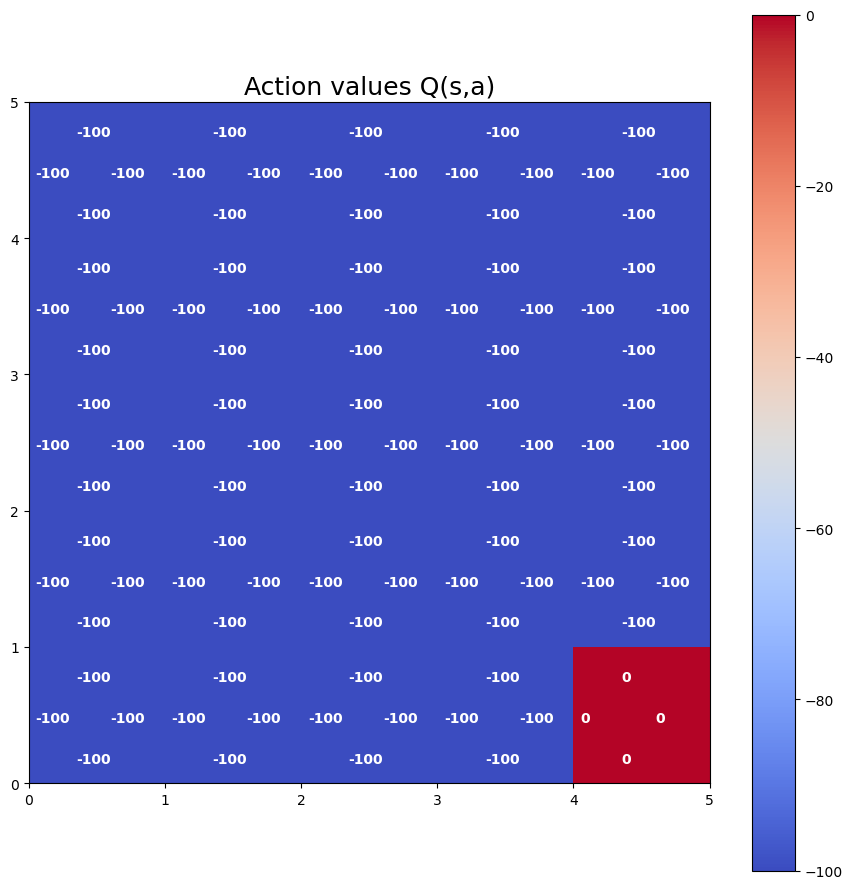

In [6]:
plot_action_values(action_values)

In [7]:
def target_policy(state):
    av = action_values[state]
    return np.random.choice(np.flatnonzero(av == av.max()))

In [8]:
action = target_policy((0,0))
print(f"Action taken in state (0,0): {action}")

Action taken in state (0,0): 3


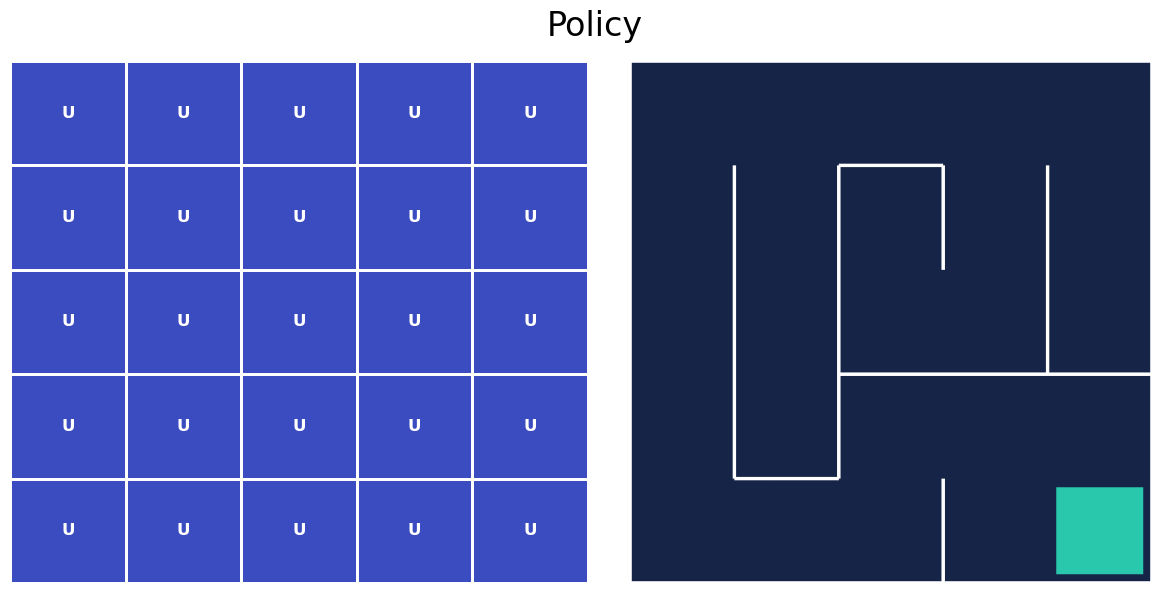

In [9]:
plot_policy(action_values, frame)

In [10]:
def exploratory_policy(state,epsilon=0.):
    if np.random.random() < epsilon:
        return np.random.randint(4)
    else:
        av = action_values[state]
        return np.random.choice(np.flatnonzero(av == av.max()))

In [11]:
action = exploratory_policy((0,0))
print(f"Action taken in state (0,0): {action}")

Action taken in state (0,0): 1


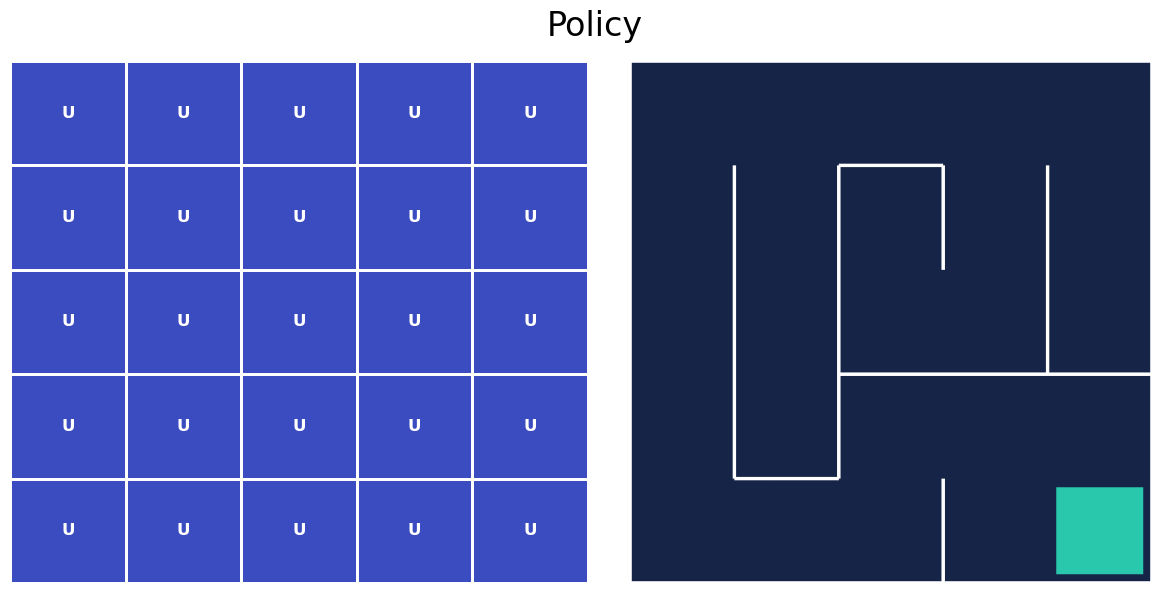

In [12]:
plot_policy(action_values, frame)

In [13]:
def off_policy_mc_control(action_values, target_policy, exploratory_policy,episodes,gamma=0.99,epsilon=0.2):
    for episode in range(1, episodes + 1):
        G = 0
        W = 1
        csa = np.zeros((5,5,4))
        state = env.reset()
        done = False
        transitions = []
        
        while not done:
            action = exploratory_policy(state, epsilon)
            next_state, reward, done, _ = env.step(action)
            transitions.append([state,action,reward])
            state = next_state
        
        for state_t, action_t, reward_t in reversed(transitions):
            G = reward_t + gamma * G
            csa[state_t][action_t] += W
            qsa = action_values[state_t][action_t]
            action_values[state_t][action_t] += (W / csa[state_t][action_t]) * (G -qsa)
            
            if action_t != target_policy(state_t):
                break
            
            W = W * 1. / (1 - epsilon + epsilon/4)

In [27]:
off_policy_mc_control(action_values, target_policy,exploratory_policy, episodes=1000, epsilon=0.3)

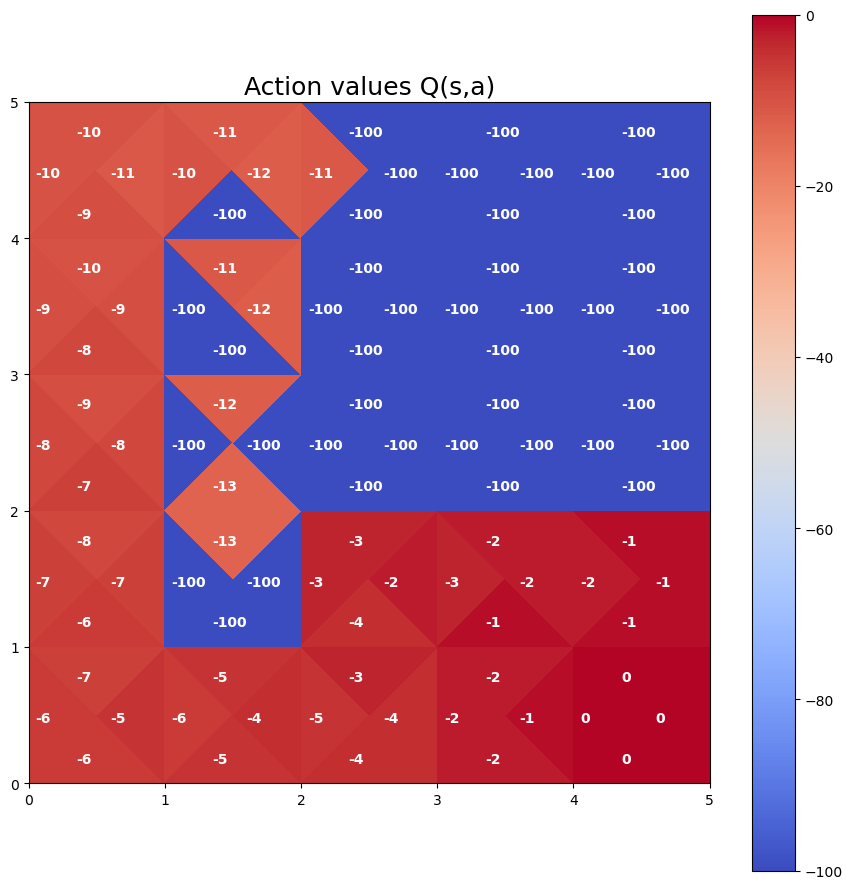

In [28]:
plot_action_values(action_values)

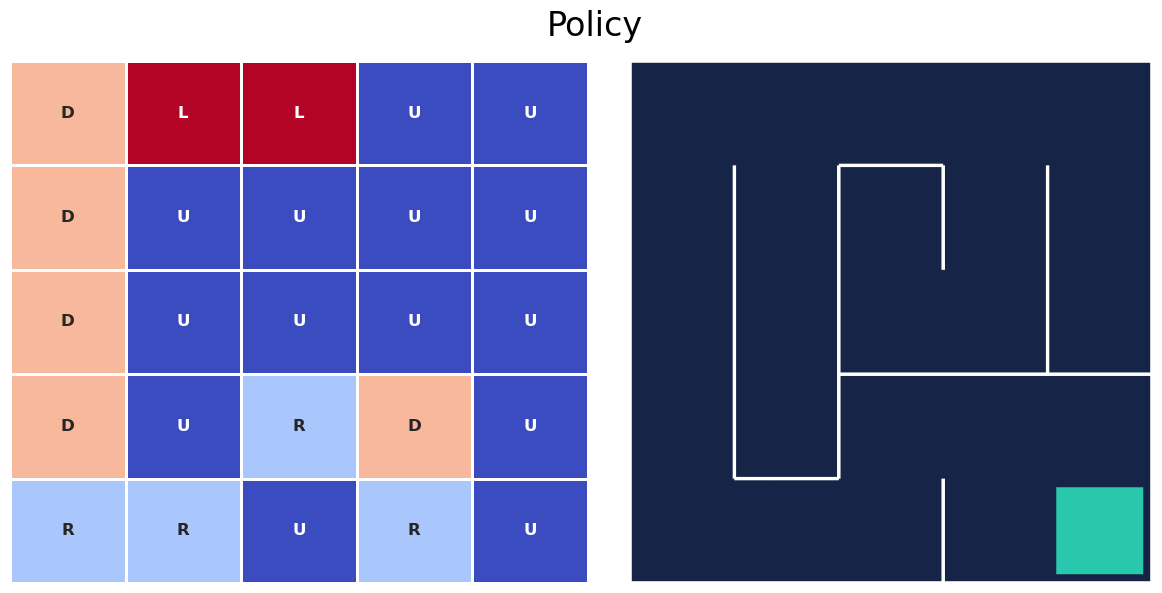

In [29]:
plot_policy(action_values, frame)

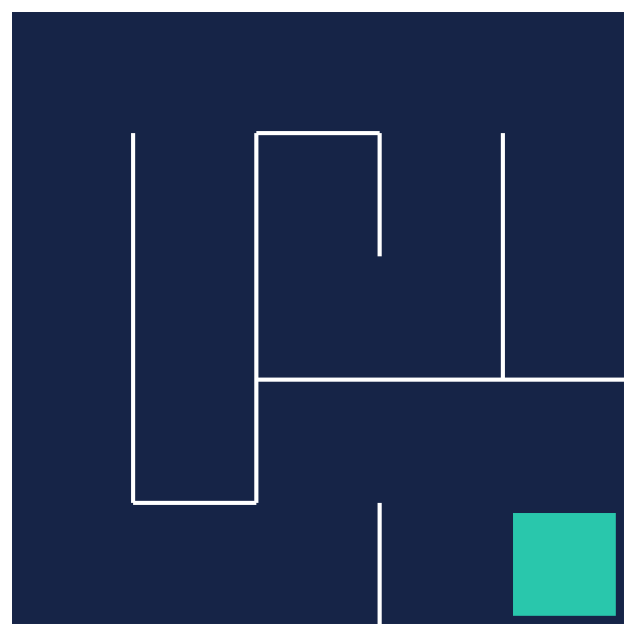

In [30]:
test_agent(env, target_policy)